## Emotion Detection and Recognition
Emotion Detection and Recognition from text is closely related to Sentiment Analysis which aims to detect and recognize various types of feelings through the expression of texts, such as anger, disgust, fear, happiness, sadness, and surprise unlike sentiment analysis which detects positive, neutral, or negative feelings from text.


## Data Preprocessing:

- Read the dataset ISEAR.csv which is in the current path.
- Visualise and Clean the dataset
- Perform any preprocessing that may be required

The Emotions in the dataset should be: 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame' and 'guilt'.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
columns = ['index', 'target', 'data']
df = pd.read_csv('ISEAR.csv', names=columns, index_col='index')
df.head()

,target,data
index,,
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [182]:
df['target'].value_counts()

joy        1082
sadness    1074
anger      1069
fear       1063
disgust    1059
shame      1059
guilt      1040
Name: target, dtype: int64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7446 entries, 0 to 7445
Data columns (total 2 columns):
target    7446 non-null object
data      7446 non-null object
dtypes: object(2)
memory usage: 174.5+ KB


In [184]:
# target = pd.get_dummies(df['target'], drop_first=True)
# target.head()
df.head()

,target,data
index,,
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [185]:
def print_row(n):
    print(df['data'][n], df.target[n], sep=' = ')
    print('\n')

In [186]:
def get(n):
    return df['data'][n]

In [187]:
for i in range(10,15):
    print_row(i)

When I recently thought about the hard work it takes to study, and   
how one wants to try something else.  When I read a theoretical  
book in English that I did not understand. = sadness


When I found a bristle in the liver paste tube. = disgust


When I was tired and unmotivated, I shouted at my girlfriend and  
and brought up negative sides of her character which are actually  
not so important. = shame


When I think that I do not study enough.  After the weekend I  
think that I should have been able to have accomplished  
something during that time. = guilt


When I pass an examination which I did not think I did well. = joy




In [188]:
import string


In [189]:
# https://gist.github.com/sebleier/554280
stopwords = """i
me
my
myself
we
our
ours
ourselves
you
your
yours
yourself
yourselves
he
him
his
himself
she
her
hers
herself
it
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
should
now"""

stopwords = stopwords.split('\n')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [190]:
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

In [207]:
def preprocess_message(message):
    """Removes punctuations, any words with digits & then returns lowercase version of the message
    """
    #Remove punctuations
    no_punctuation = [char for char in message if char not in string.punctuation]
    joined = ''.join(no_punctuation)
    #Remove stopwords or any word with numbers
    #Convert to lower case 
    return [ word.lower() for word in joined.split() if (word.lower() not in stopwords) and (not hasNumbers(word))]

In [192]:
preprocess_message(df['data'][0])

['days',
 'feel',
 'close',
 'partner',
 'friends',
 'feel',
 'peace',
 'also',
 'experience',
 'close',
 'contact',
 'people',
 'regard',
 'greatly']

In [193]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold

In [194]:
X = df['data']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [195]:
count_vectorizer = CountVectorizer(analyzer=preprocess_message).fit(X_train)

In [196]:
names = count_vectorizer.get_feature_names()
print(names)
print(len(names))


['aa', 'abandoned', 'abdomen', 'abdominal', 'abhorred', 'abhorrent', 'abilities', 'ability', 'able', 'abnormal', 'aboriginal', 'aborted', 'abortion', 'aboveboard', 'abroad', 'abrupt', 'abruptely', 'abruptly', 'absailing', 'abscence', 'absence', 'absent', 'absentminded', 'absentmindedness', 'absolutely', 'absurd', 'abuse', 'abused', 'abusing', 'abusive', 'abut', 'academic', 'academically', 'academics', 'academy', 'acccouting', 'accelerating', 'accent', 'accentance', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'acceptted', 'accident', 'accidentally', 'accidentaly', 'accidently', 'accidents', 'accomodation', 'accompanied', 'accompany', 'accompanying', 'accomplish', 'accomplished', 'accomplishing', 'accomplishment', 'accorded', 'according', 'accosted', 'account', 'accounting', 'accounts', 'accquaintances', 'accquainted', 'accquired', 'accquiring', 'accredited', 'accrediting', 'accumulated', 'accusations', 'accused', 'accusers', 'accuses', 'ache', 'achieve', 'achieved', '

In [197]:
vecotrized = count_vectorizer.transform(X_train)

In [198]:
tfidf_transformer = TfidfTransformer().fit(vecotrized)
transformed = tfidf_transformer.transform(vecotrized)

In [199]:
tfidf_transformer.idf_[count_vectorizer.vocabulary_['close']]

4.487151289158847

In [200]:
print(transformed)

  (0, 8393)	0.382325267682
  (0, 4934)	0.464404434036
  (0, 3558)	0.337360338051
  (0, 2543)	0.600482092724
  (0, 232)	0.404679095047
  (1, 8223)	0.162901454255
  (1, 8062)	0.332541637505
  (1, 7626)	0.158102925714
  (1, 7470)	0.359904403441
  (1, 6711)	0.246915798766
  (1, 6431)	0.300529253528
  (1, 6392)	0.189204394746
  (1, 6031)	0.292607551725
  (1, 5994)	0.192758278517
  (1, 4817)	0.190264220191
  (1, 4325)	0.206675299079
  (1, 4291)	0.232053922456
  (1, 4280)	0.212828457585
  (1, 3448)	0.28601290351
  (1, 2553)	0.273166487593
  (1, 1088)	0.253001070537
  (2, 8258)	0.424593669073
  (2, 6613)	0.515616008697
  (2, 6433)	0.233188261264
  (2, 4809)	0.360606815993
  :	:
  (6699, 5007)	0.34952639569
  (6699, 4901)	0.328729237495
  (6699, 4672)	0.22185703412
  (6699, 4520)	0.312706882892
  (6699, 1308)	0.230155427289
  (6699, 176)	0.327047378517
  (6700, 8117)	0.281077110392
  (6700, 7784)	0.184962438171
  (6700, 7586)	0.218292546698
  (6700, 5872)	0.207878300894
  (6700, 5858)	0.2810771

## Model Creation:

Create any model you wish that classifies emotions with an accuracy > 60%. 
You can use all the data in X in the training set itself or split it.
Save the model as model. Your model will be graded using model.predict on hidden dataset.
<br> Since the dataset is very less, Model with accuracy >60% is enough to pass the course.
<br> **We highly recommend you to test and use as many skills you have learned in this course and have explore further in the web.**

In [201]:
from sklearn.naive_bayes import MultinomialNB

#Creating Custom Classifier cause can't override the last cell.
class CustomClassifier(MultinomialNB):

    def __init__(self, alpha=1.0, fit_prior=True, class_prior=None, tdidf=None, count_vectorizer=None):
        self.tfidf_transformer = tdidf
        self.count_vectorizer = count_vectorizer
        super().__init__(alpha, fit_prior, class_prior)

    def predict(self, X):
        """
        If the X is a list or Series, we'll first have to transform it into sparse matrix.
        We are doing this because i couldn't override the last cell of this Notebook.
        Overriding the predict function to take in a list and transform it to required type then continuing with the prediction
        
        """
        if (self.tfidf_transformer is not None and self.count_vectorizer is not None) and (type(X) is list or isinstance(X_test, pd.Series)):
            print('X is a list or Series so first transforming it into sparse matrix...')
            X = tfidf_transformer.transform(count_vectorizer.transform(X))
        return super().predict(X)


In [202]:
model = CustomClassifier(tdidf=tfidf_transformer, count_vectorizer=count_vectorizer).fit(transformed, y_train)
predictions = model.predict(X_test)

X is a list or Series so first transforming it into sparse matrix...


In [208]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)*100

60.402684563758392

In [211]:
#SHORTHAND WAY
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(analyzer=preprocess_message)),
    ('tfidf', TfidfTransformer()),
    ('classifier', CustomClassifier())
	])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
accuracy_score(y_test, predictions)

0.60402684563758391

In [244]:
def sentiment_analyze(data, model):
    data = data.split('\n')
    predictions = model.predict(data)
    new_df = pd.DataFrame(data={
        "data":data,
        "target":predictions
    })
    new_df['target'].value_counts().plot(kind='bar')
    return new_df

X is a list or Series so first transforming it into sparse matrix...


,data,target
0,When you try your best but you don't succeed,sadness
1,When you get what you want but not what you need,anger
2,When you feel so tired but you can't sleep,guilt
3,Stuck in reverse,fear
4,When the tears come streaming down your face,anger
5,'Cause you lose something you can't replace,guilt
6,When you love someone but it goes to waste,disgust
7,What could it be worse?,sadness
8,Lights will guide you home,fear
9,And ignite your bones,joy


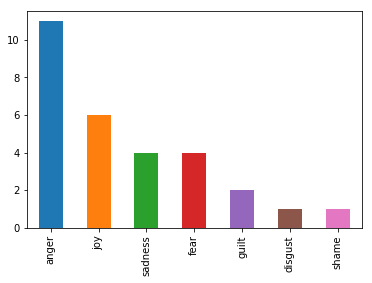

In [245]:
#Coldplay -FIX YOU sentiment analysis
test_X = """When you try your best but you don't succeed 
When you get what you want but not what you need 
When you feel so tired but you can't sleep 
Stuck in reverse
When the tears come streaming down your face 
'Cause you lose something you can't replace 
When you love someone but it goes to waste 
What could it be worse?
Lights will guide you home 
And ignite your bones 
And I will try to fix you
But high up above or down below 
When you are too in love to let it show 
Oh but if you never try you'll never know 
Just what you're worth
Lights will guide you home 
And ignite your bones 
And I will try to fix you
Tears come streaming down your face
When you lose something you cannot replace
oh and tears come streaming down your face
And I
Tears streaming down your face
I promise you I will learn from all my mistakes
oh and the tears streaming down your face
And I
Lights will guide you home 
And ignite your bones 
And I will try to fix you"""
sentiment_analyze(test_X, model).head(100)

X is a list or Series so first transforming it into sparse matrix...


,data,target
0,Is this the real life?,joy
1,Is this just fantasy?,joy
2,Caught in a landslide,shame
3,No escape from reality,fear
4,Open your eyes,fear
5,Look up to the skies and see,disgust
6,"I'm just a poor boy, I need no sympathy",shame
7,"Because I'm easy come, easy go",sadness
8,"A little high, little low",guilt
9,"Anyway the wind blows, doesn't really matter t...",sadness


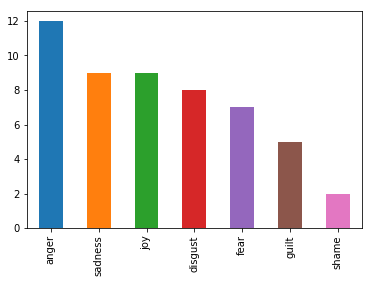

In [248]:
test_X = """Is this the real life?
Is this just fantasy?
Caught in a landslide
No escape from reality
Open your eyes
Look up to the skies and see
I'm just a poor boy, I need no sympathy
Because I'm easy come, easy go
A little high, little low
Anyway the wind blows, doesn't really matter to me, to me
Mama, just killed a man
Put a gun against his head
Pulled my trigger, now he's dead
Mama, life had just begun
But now I've gone and thrown it all away
Mama, oh oh 
Didn't mean to make you cry
If I'm not back again this time tomorrow
Carry on, carry on, as if nothing really matters
Too late, my time has come
Sends shivers down my spine
Body's aching all the time
Goodbye everybody I've got to go
Gotta leave you all behind and face the truth
Mama, oh oh (anyway the wind blows)
I don't want to die
Sometimes wish I'd never been born at all
I see a little silhouetto of a man
Scaramouch, Scaramouch will you do the Fandango
Thunderbolt and lightning very very frightening me
Gallileo, Gallileo, Gallileo, Gallileo, Gallileo, figaro, magnifico
I'm just a poor boy and nobody loves me
He's just a poor boy from a poor family
Spare him his life from this monstrosity
Easy come easy go will you let me go
Bismillah, no we will not let you go, let him go
Bismillah, we will not let you go, let him go
Bismillah, we will not let you go, let me go
(Will not let you go) let me go (never, never let you go) let me go (never let me go)
Oh oh no, no, no, no, no, no, no
Oh mama mia, mama mia, mama mia let me go
Beelzebub has a devil put aside for me for me for me
So you think you can stop me and spit in my eye
So you think you can love me and leave me to die
Oh baby can't do this to me baby
Just gotta get out just gotta get right outta here
Oh oh oh yeah, oh oh yeah
Nothing really matters
Anyone can see
Nothing really matters 
Nothing really matters to me
Anyway the wind blows"""
df_result = sentiment_analyze(test_X, model)
df_result.head(100)


In [212]:
test_X =["I just won a Million Dollar. I don't know what to do with this money.",
        'After seeing a horror film - Omen.  I could not sleep at night even though I closed my eyes.  The last scene of the film kept coming back to me, I seemed to hear the girls in the film  \nshouting at the devil.  The devil did not have any expression on  \nhis face and I thought that he would choose me.']
test_y=['joy','fear']

prediction = model.predict(test_X)
assert(prediction[0]==test_y[0])
assert(prediction[1]==test_y[1])

X is a list or Series so first transforming it into sparse matrix...


Congratulations, you have reached the end of the Module Project